In [39]:
import numpy as np
import pandas as pd
from tqdm import  tqdm
import pickle
import cobra
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [40]:
### input 
unikp_km_predict_path = '../../Results/kcat_km_predict/yeast8U_unikp.csv'
unikp_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_unikp.csv'
km_km_predict_path = '../../Results/kcat_km_predict/yeast8U_km_km_predict.csv'
dlkcat_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_kcat_predict.csv'
turnup_kcat_predict_path = '../../Results/kcat_km_predict/yeast8U_kcat_result_TurNuP.csv'

### output
Specialist_Generalist_kcat_figure = '../../Results/Figures/figs11.pdf'
# Specialist_Generalist_km_figure = '../../Results/Figures/figs11-b.pdf'

In [41]:
kcat_pre_df = pd.read_csv(dlkcat_kcat_predict_path,index_col=None)
kcat_pre_df = kcat_pre_df[kcat_pre_df['rea_id'].str.contains('r_')]
result_dict = {}
for gene in set(kcat_pre_df['gene'].to_list()):
    reaction_list = kcat_pre_df[kcat_pre_df['gene']==gene]['rea_id'].to_list()
    processed_reaction_list = list(set([('_').join(x.split('_')[0:2]) if 'r_' in x else x.split('_')[0] for x in reaction_list]))
    result_dict[gene] = processed_reaction_list

result = []
Specialist_enzyme_yeast8 = [k for k,v in result_dict.items() if len(v)<2]

In [42]:
len(Specialist_enzyme_yeast8)

501

# Specialist/Generalist enzyme kcat

In [48]:
kcat_pre_df = pd.read_csv(dlkcat_kcat_predict_path,index_col=None)

Specialist_kcat_pre_df = kcat_pre_df[kcat_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
Generalist_kcat_pre_df = kcat_pre_df[~kcat_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
Specialist_kcat_values1 = np.sort(Specialist_kcat_pre_df["kcat"])  # median
Generalist_kcat_values1 = np.sort(Generalist_kcat_pre_df["kcat"])  # KM
# 计算中位数
Specialist_kcat_values_median1 = np.median(Specialist_kcat_values1)
Generalist_kcat_values_median1 = np.median(Generalist_kcat_values1)
print("Specialist_kcat_values_median:", Specialist_kcat_values_median1)
print("Generalist_kcat_values_median:", Generalist_kcat_values_median1)
# 执行独立样本 t 检验
log_specialist = np.log10(Specialist_kcat_values1)
log_generalist = np.log10(Generalist_kcat_values1)
# 执行独立样本 t 检验
t_stat, p_value = ttest_ind(log_specialist, log_generalist, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")
print('=================')

Specialist_kcat_values_median: 6.1501
Generalist_kcat_values_median: 5.4336
T-statistic: -10.746656472769784, p-value: 6.309585625715626e-27


In [49]:
kcat_pre_df = pd.read_csv(unikp_kcat_predict_path,index_col=None)

Specialist_kcat_pre_df = kcat_pre_df[kcat_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
Generalist_kcat_pre_df = kcat_pre_df[~kcat_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
Specialist_kcat_values2 = np.sort(Specialist_kcat_pre_df["kcat"])  # median
Generalist_kcat_values2 = np.sort(Generalist_kcat_pre_df["kcat"])  # KM
# 计算中位数
Specialist_kcat_values_median2 = np.median(Specialist_kcat_values2)
Generalist_kcat_values_median2 = np.median(Generalist_kcat_values2)
print("Specialist_kcat_values_median:", Specialist_kcat_values_median2)
print("Generalist_kcat_values_median:", Generalist_kcat_values_median2)
# 执行独立样本 t 检验
log_specialist = np.log10(Specialist_kcat_values2)
log_generalist = np.log10(Generalist_kcat_values2)
# 执行独立样本 t 检验
t_stat, p_value = ttest_ind(log_specialist, log_generalist, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")
print('=================')

Specialist_kcat_values_median: 3.800437741290941
Generalist_kcat_values_median: 3.245359904124588
T-statistic: 37.40558135646792, p-value: 1.6644900177718508e-304


In [52]:
kcat_pre_df = pd.read_csv(turnup_kcat_predict_path,index_col=None)

Specialist_kcat_pre_df = kcat_pre_df[kcat_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
Generalist_kcat_pre_df = kcat_pre_df[~kcat_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
Specialist_kcat_values3 = np.sort(Specialist_kcat_pre_df["kcat"])  # median
Generalist_kcat_values3 = np.sort(Generalist_kcat_pre_df["kcat"])  # KM
# 计算中位数
Specialist_kcat_values_median3 = np.median(Specialist_kcat_values3)
Generalist_kcat_values_median3 = np.median(Generalist_kcat_values3)
print("Specialist_kcat_values_median:", Specialist_kcat_values_median3)
print("Generalist_kcat_values_median:", Generalist_kcat_values_median3)
# 执行独立样本 t 检验
log_specialist = np.log10(Specialist_kcat_values3)
log_generalist = np.log10(Generalist_kcat_values3)
# 执行独立样本 t 检验
t_stat, p_value = ttest_ind(log_specialist, log_generalist, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")
print('=================')

Specialist_kcat_values_median: 13.1497345
Generalist_kcat_values_median: 9.973
T-statistic: 42.59640087939411, p-value: 0.0


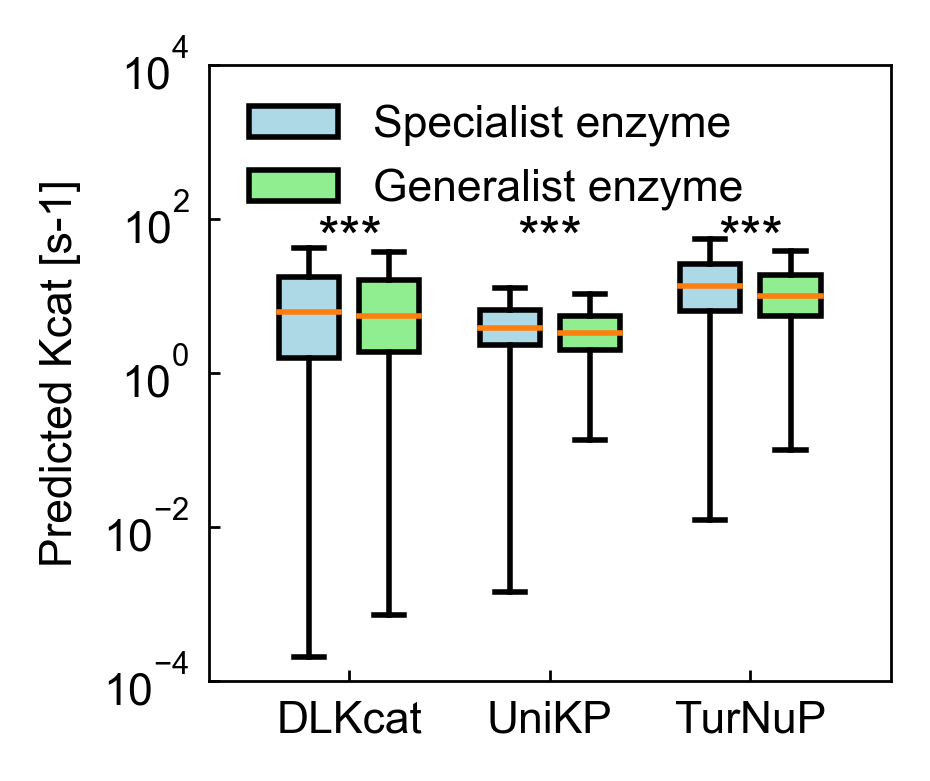

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
data1 = [Specialist_kcat_values1,Generalist_kcat_values1]
data2 = [Specialist_kcat_values2,Generalist_kcat_values2]
data3 = [Specialist_kcat_values3,Generalist_kcat_values3]
# 定义宽度
width = 0.2

# 创建图形和轴
plt.figure(figsize=(2.2, 2), dpi=400)
plt.rcParams.update({'font.size': 6})
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42

# Set axis styles
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.gca().spines['top'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['right'].set_linewidth(0.5)

# 绘制箱线图
positions = [1 - width, 1 + width, 2 - width, 2 + width, 3 - width, 3 + width]
data = data1 + data2 + data3
labels = ['Specialist','Generalist'] * 3 
colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen', 'lightblue', 'lightgreen']

boxes = []
for i in range(6):
    box = plt.boxplot(data[i], positions=[positions[i]], widths=0.3, patch_artist=True, 
                      showfliers=False, boxprops=dict(facecolor=colors[i], color='black'))
    boxes.append(box)

# 设置 x 轴和 y 轴标签
plt.ylabel('Predicted Kcat [s-1]', fontsize=8)

# 设置坐标轴参数
plt.xticks([1, 2, 3], ['DLKcat', 'UniKP', 'TurNuP'], fontsize=8)
plt.ylim(0.0001, 10000)
plt.yscale('log')
plt.yticks([0.0001,0.01, 1, 100,10000], fontsize=8)
plt.grid(False)
plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
plt.minorticks_off()  # 隐藏次级刻度

# 提取图例句柄和标签
handles = [box['boxes'][0] for box in boxes[:2]]  # Specialist 图例句柄
handles += [box['boxes'][0] for box in boxes[3:5]]  # Generalist 图例句柄
labels = ['Specialist enzyme', 'Generalist enzyme']

plt.text(1, 50, "***", ha='center', va='center', fontsize=10, color='black')
plt.text(2, 50, "***", ha='center', va='center', fontsize=10, color='black')
plt.text(3, 50, "***", ha='center', va='center', fontsize=10, color='black')

# 创建图例
plt.legend(handles=handles[:2], labels=labels, loc='upper left', frameon=False, fontsize=8)

# 保存图形
plt.savefig(Specialist_Generalist_kcat_figure, dpi=400, bbox_inches='tight')
# 显示图形
plt.show()

# Specialist/Generalist enzyme km

In [60]:
# km_pre_df = pd.read_csv(unikp_km_predict_path,index_col=None)

# Specialist_km_pre_df = km_pre_df[km_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
# Generalist_km_pre_df = km_pre_df[~km_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
# Specialist_km_values1 = np.sort(Specialist_km_pre_df["km"])  # median
# Generalist_km_values1 = np.sort(Generalist_km_pre_df["km"])  # KM
# # 计算中位数
# Specialist_km_values_median1 = np.median(Specialist_km_values1)
# Generalist_km_values_median1 = np.median(Generalist_km_values1)
# print("Specialist_km_values_median:", Specialist_km_values_median1)
# print("Generalist_km_values_median:", Generalist_km_values_median1)
# print('=================')

In [61]:
# km_pre_df = pd.read_csv(km_km_predict_path,index_col=None)
# km_pre_df.rename(columns={'KM':'km'},inplace=True)

# Specialist_km_pre_df = km_pre_df[km_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
# Generalist_km_pre_df = km_pre_df[~km_pre_df['gene'].isin(Specialist_enzyme_yeast8)]
# Specialist_km_values2 = np.sort(Specialist_km_pre_df["km"])  # median
# Generalist_km_values2 = np.sort(Generalist_km_pre_df["km"])  # KM
# # 计算中位数
# Specialist_km_values_median2 = np.median(Specialist_km_values2)
# Generalist_km_values_median2 = np.median(Generalist_km_values2)
# print("Specialist_km_values_median:", Specialist_km_values_median2)
# print("Generalist_km_values_median:", Generalist_km_values_median2)
# print('=================')

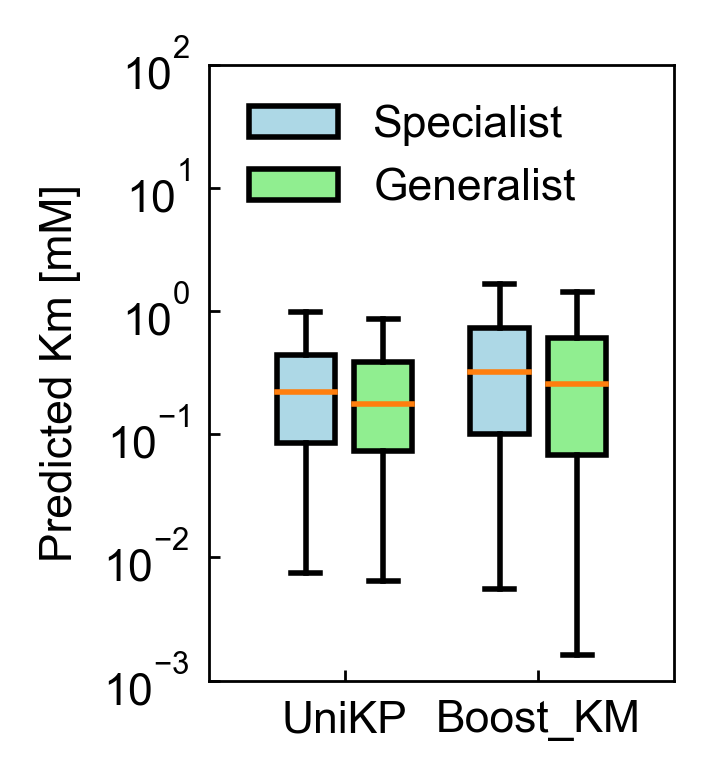

In [27]:
# import matplotlib.pyplot as plt
# import numpy as np

# # 示例数据
# data1 = [Specialist_km_values1,Generalist_km_values1]
# data2 = [Specialist_km_values2,Generalist_km_values2]
# # data3 = [Specialist_kcat_values3,Generalist_kcat_values3]
# # 定义宽度
# width = 0.2

# # 创建图形和轴
# plt.figure(figsize=(1.5, 2), dpi=400)
# plt.rcParams.update({'font.size': 6})
# plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['pdf.fonttype'] = 42

# # Set axis styles
# plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# plt.gca().spines['top'].set_linewidth(0.5)
# plt.gca().spines['bottom'].set_linewidth(0.5)
# plt.gca().spines['left'].set_linewidth(0.5)
# plt.gca().spines['right'].set_linewidth(0.5)

# # 绘制箱线图
# positions = [1 - width, 1 + width, 2 - width, 2 + width]
# data = data1 + data2 
# labels = ['Specialist','Generalist'] * 2
# colors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen']

# boxes = []
# for i in range(4):
#     box = plt.boxplot(data[i], positions=[positions[i]], widths=0.3, patch_artist=True, 
#                       showfliers=False, boxprops=dict(facecolor=colors[i], color='black'))
#     boxes.append(box)

# # 设置 x 轴和 y 轴标签
# plt.ylabel('Predicted Km [mM]', fontsize=8)
# # 设置坐标轴参数
# plt.xticks([1, 2], ['UniKP', 'Boost_KM'], fontsize=8)
# plt.ylim(0.001, 100)
# plt.yscale('log')
# plt.yticks([0.001, 0.01, 0.1, 1,10,100], fontsize=8)
# plt.grid(False)
# plt.tick_params(axis='both', direction='in', width=0.5, which='both', length=2)
# plt.minorticks_off()  # 隐藏次级刻度

# # 提取图例句柄和标签
# handles = [box['boxes'][0] for box in boxes[:2]]  # Specialist 图例句柄
# handles += [box['boxes'][0] for box in boxes[3:5]]  # Generalist 图例句柄
# labels = ['Specialist', 'Generalist']

# # 创建图例
# plt.legend(handles=handles[:2], labels=labels, loc='upper left', frameon=False, fontsize=8)

# # 保存图形
# plt.savefig(Specialist_Generalist_km_figure, dpi=400, bbox_inches='tight')
# # 显示图形
# plt.show()

In [102]:
# kcat_pre_df = pd.read_csv(unikp_kcat_predict_path,index_col=None)
# kcat_pre_df

# enzyeme_list = set(kcat_pre_df['gene'].to_list())
# enzyeme_reaction_num = {
#     'enzyme': [],
#     'reaction_num': [],
#     'kcat': []
# }

# for i in enzyeme_list:
#     tmp = kcat_pre_df[kcat_pre_df['gene'] == i]
#     reaction_list = [('_').join(x.split('_')[0:2]) if 's_' in x else x.split('_')[0] for x in tmp['rea_id']]
#     reaction_num = len(set(reaction_list))
#     kcat_list = tmp['kcat'].to_list()

#     enzyeme_reaction_num['enzyme'].append(i)
#     enzyeme_reaction_num['reaction_num'].append(reaction_num)
#     enzyeme_reaction_num['kcat'].append(kcat_list)

# result = pd.DataFrame(enzyeme_reaction_num).sort_values('reaction_num',ascending=True).reset_index(drop=True)
# result

# result_median = {}
# for i in range(1,600,20):
#     kcat_list = []
#     tmp = result[result['reaction_num'] < i]
#     for x in tmp['kcat']:
#         kcat_list += x
#     kcat_values = np.sort(kcat_list)  # median
#     kcat_values_median = np.median(kcat_values)

#     result_median[i-1]=kcat_values_median

# result_median